1. Keep h, m0, i2 dimensions, and i1 hmdr fixed. Then observe the 3 variables (h-d0, h-d1, radwidth).
2. Fix the right uncovered ratio and (h-d0)/radwidth, then vary the other stuff (through "good" values).

If AM dependence is solely dependent on the right uncovered ratio and (h-d0)/radwidth, find that relation. If not, identify what else is there.

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from scipy import stats


In [2]:
def swap_vals(prob, d, a):
  # Avoids mk recomputations.
  prob.d = d
  prob.a = a
  prob.scale = a
  return prob

def random_m0(h):
  # need m0 * h < 40
  return random.uniform(low=0.0, high=(40/h))

In [ ]:
file1 = "data/predetermined-1.pkl"
file2 = "data/predetermined-2.pkl"

h = 30
m0 = 1
right_ratios = list(np.linspace(0.05, 0.9, 18)) + list(np.linspace(0.91, 1, 10)) + list(np.linspace(1.01, 1.05, 5)) + list(np.linspace(1.1, 2.95, 38))
hmdrs = list(np.linspace(1, 20, 20))

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [1, 0, 0]
rho = 1023

def populate_d_a(h, rr, hmdr):
  hmd0 = 10 # 20
  hmd1 = rr * hmd0
  hmd2 = 15
  radwidth0 = hmd0/hmdr
  radwidth1 = hmd1/3
  radwidth2 = 5
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  return d, a


# all_prob_dicts = []
# prob = ConvergenceProblemI(h, [1,1,1], [1,2,3], heaving, NMK, m0, rho)
# mk = prob.m_k
# for rr in right_ratios:
#   for hmdr in hmdrs:
#     d, a = populate_d_a(h, rr, hmdr)
#     info = {"h" : h,
#             "d" : d,
#             "a" : a,
#             "region" : 0,
#             "m0s" : [m0]}
#     swap_vals(prob, d, a)
#     print(info)
#     data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#     all_prob_dicts.append(data_dict)
#   update_data_file(all_prob_dicts, file2)
#   print(f"Finished rr = {rr:.3g}.")

In [4]:
# Extract data and add convergence metrics to the dictionaries
all_prob_dicts = open_pkl_file(file2)
generate_convergence_data(all_prob_dicts, [0.01, 0.005])
log_data = generate_log_data(all_prob_dicts)

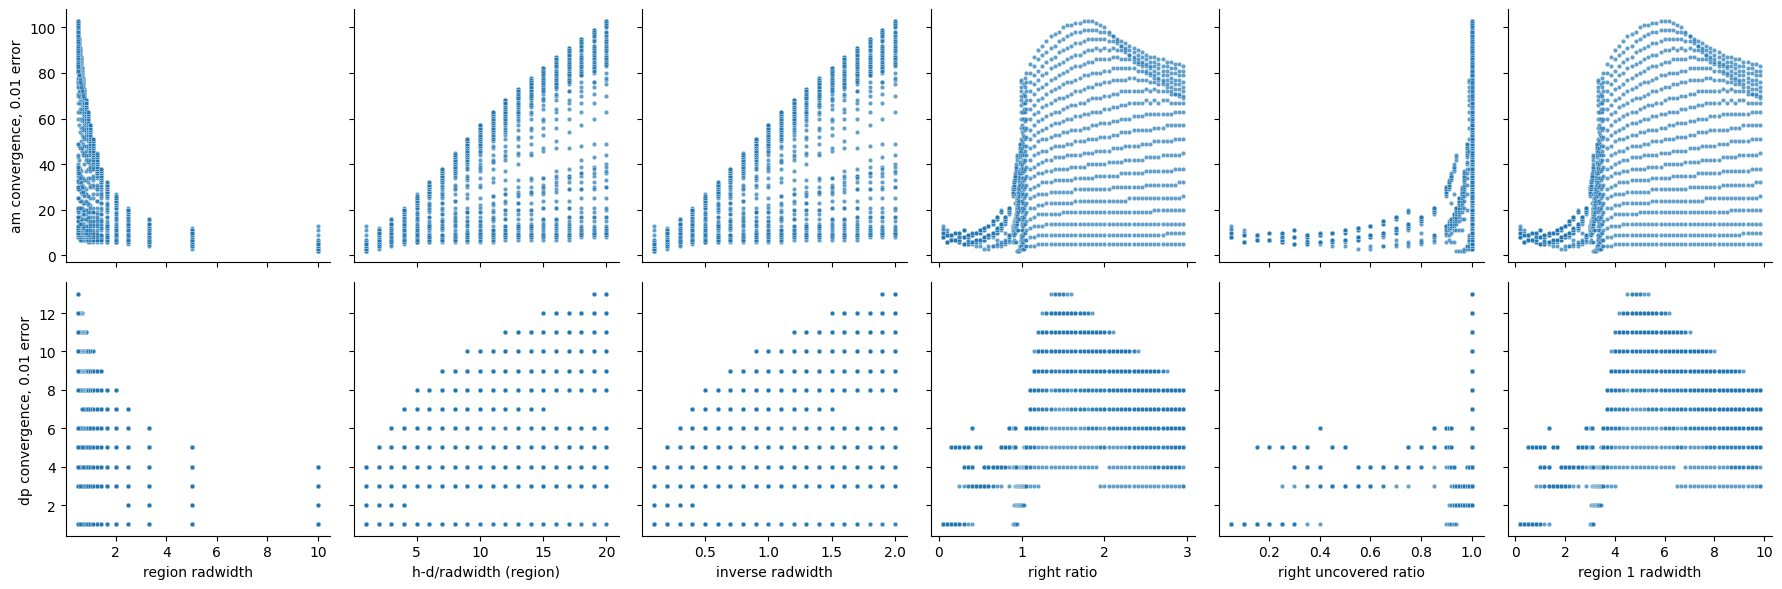

In [5]:
# Plot convergence point on y, variable combo on x.
def xf1(config, m0):
  return config["h"]

def xf2(config, m0):
  return m0

def xf3(config, m0):
  return m0 * config["h"]

def xf4(config, m0):
  return (config["a"][-1])

def xf5(config, m0):
  return (config["h"] - config["d"][config["region"]])

def xf6(config, m0):
  region = config["region"]
  if region == 0:
    return config["a"][region]
  else:
    return config["a"][region] - config["a"][region - 1]
  
def xf7(config, m0):
  return config["a"][-1] - config["a"][-2]

def xf8(config, m0):
  radwidth = xf6(config, m0)
  return (config["h"] - config["d"][config["region"]])/radwidth

def xf9(config, m0):
  radwidth = xf7(config, m0)
  return (config["h"] - config["d"][-1])/radwidth

def xf10(config, m0):
  return (config["h"] - config["d"][-1])/(config["h"])

def xf11(config, m0):
  return (config["h"] - config["d"][-1]) * m0

def xf12(config, m0):
  radwidth = xf6(config, m0)
  return 1/radwidth

def xf13(config, m0):
  return 1/((config["h"] - config["d"][config["region"]])/(config["h"] - config["d"][config["region"] + 1]))

def xf14(config, m0):
  region = config["region"]
  right_fluid_height = config["h"] if region == 2 else (config["h"] - config["d"][region + 1])
  self_fluid_height = (config["h"] - config["d"][region])
  if right_fluid_height < self_fluid_height:
    return right_fluid_height/self_fluid_height
  else:
    return 1
  
def xf15(config, m0):
  return config["a"][1] - config["a"][0]

def yf1(config, m0):
  return config[m0]["convergence point 0.01 am"]

def yf2(config, m0):
  return config[m0]["convergence point 0.005 am"]

def yf3(config, m0):
  return config[m0]["convergence point 0.01 dp"]

def yf4(config, m0):
  return config[m0]["convergence point 0.005 dp"]

x_funcs = {# "h" : xf1,
           # "m0" : xf2,
           # "m0h" : xf3,
           # "maxrad" : xf4,
           # "h - d" : xf5,
           "region radwidth" : xf6,
           # "outermost radwidth" : xf7,
           "h-d/radwidth (region)" : xf8,
           # "h-d/radwidth (outermost)" : xf9,
           # "h-d/h (outermost)" : xf10,
           # "m0 * (h-d) (outermost)" : xf11,
           "inverse radwidth" : xf12,
           "right ratio" : xf13,
           "right uncovered ratio" : xf14,
           "region 1 radwidth" : xf15}
y_funcs = {"am convergence, 0.01 error" : yf1,
          #  "am convergence, 0.005 error" : yf2,
           "dp convergence, 0.01 error" : yf3,
          #  "dp convergence, 0.005 error" : yf4
           }

plot_relation_grid(all_prob_dicts, x_funcs, y_funcs)

In [6]:
# variable metrics
def h_minus_d_over_radwidth(data_dict):
    region = data_dict["region"]
    radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
    return (data_dict["h"] - data_dict["d"][region])/radwidth

def tall_theta(data_dict):
  hmdr = h_minus_d_over_radwidth(data_dict)
  return np.arctan(1/hmdr)

def right_ratio(data_dict):
    return (data_dict["h"] - data_dict["d"][data_dict["region"]])/(data_dict["h"] - data_dict["d"][data_dict["region"] + 1])
    
def right_uncovered_ratio(data_dict, over = True): # Fraction of right boundary with imperfect BC
    region = data_dict["region"]
    right_fluid_height = data_dict["h"] if region == 2 else (data_dict["h"] - data_dict["d"][region + 1])
    self_fluid_height = (data_dict["h"] - data_dict["d"][region])
    if (right_fluid_height < self_fluid_height) or over:
      return right_fluid_height/self_fluid_height
    else:
      return 1

In [7]:
def plot_right_uncovered_and_hmdr(data):
  plot_hydros_against_2(data, "am", 0.01,
                        lambda data_dict, m0 : right_uncovered_ratio(data_dict, over = False),
                        lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                        "right uncovered ratio", "(h-d)/radwidth")
  plot_hydros_against_2(data, "dp", 0.01,
                        lambda data_dict, m0 : right_uncovered_ratio(data_dict, over = False),
                        lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                        "right uncovered ratio", "(h-d)/radwidth")
  plot_hydros_against_2(data, "am", 0.01,
                        lambda data_dict, m0 : right_uncovered_ratio(data_dict),
                        lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                        "right uncovered ratio", "(h-d)/radwidth")
  plot_hydros_against_2(data, "dp", 0.01,
                        lambda data_dict, m0 : right_uncovered_ratio(data_dict),
                        lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                        "right uncovered ratio", "(h-d)/radwidth")

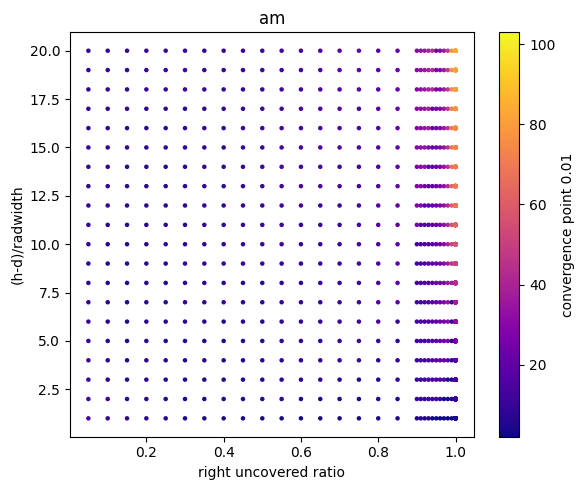

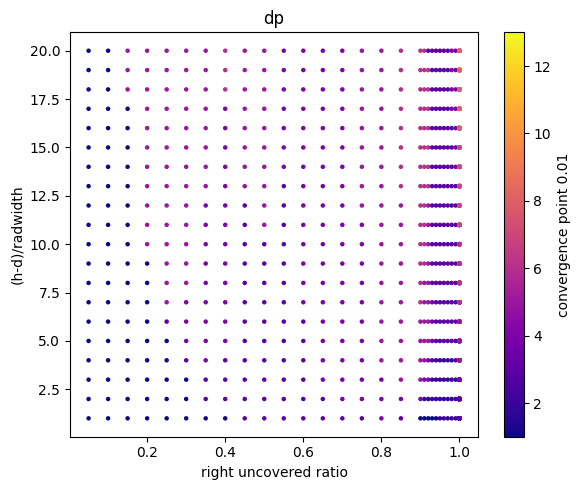

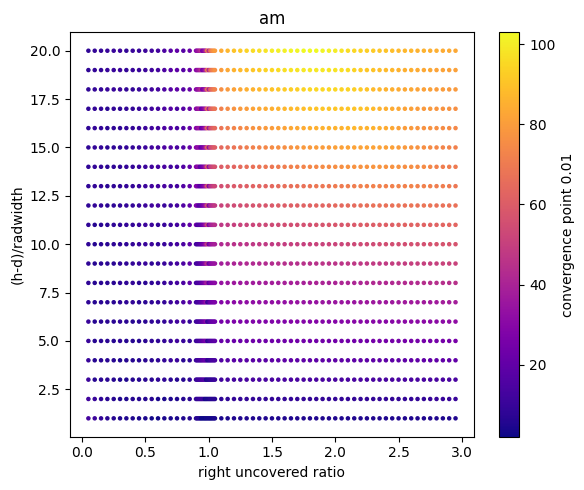

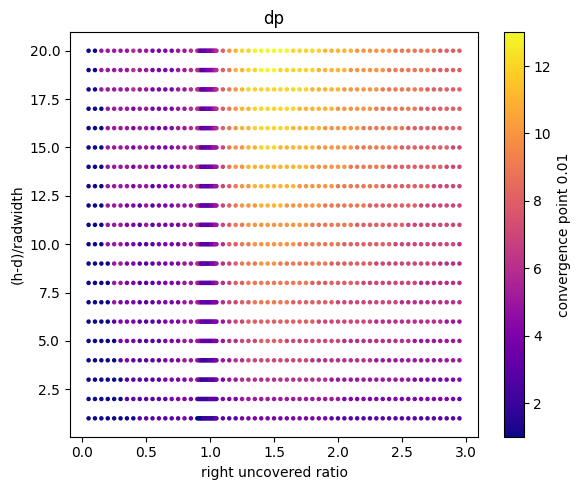

In [8]:
plot_right_uncovered_and_hmdr(all_prob_dicts)

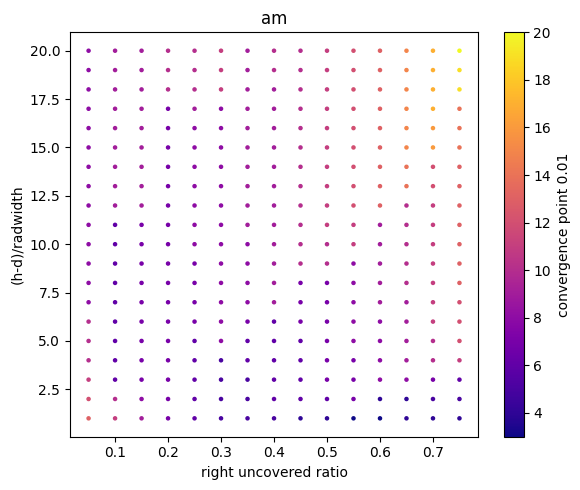

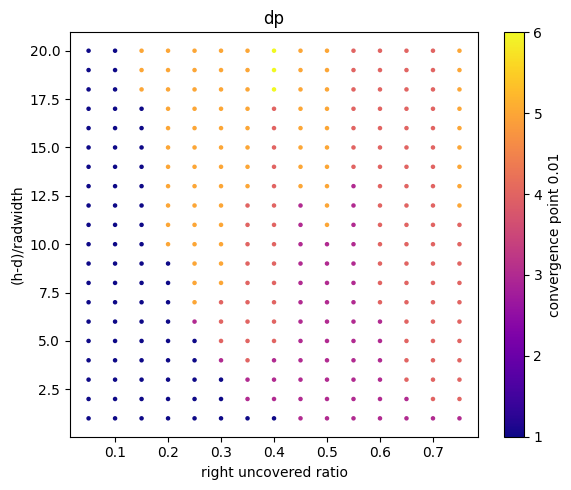

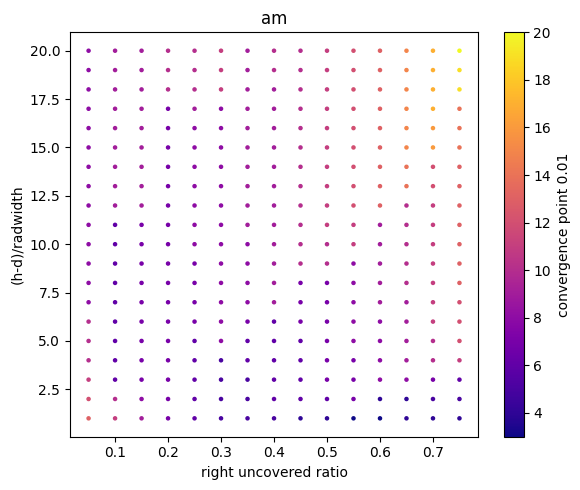

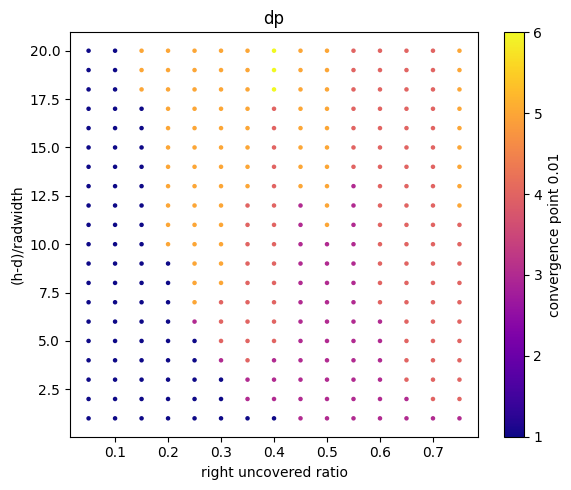

In [9]:
subset = [prob for prob in all_prob_dicts if right_uncovered_ratio(prob) < 0.8]
plot_right_uncovered_and_hmdr(subset)

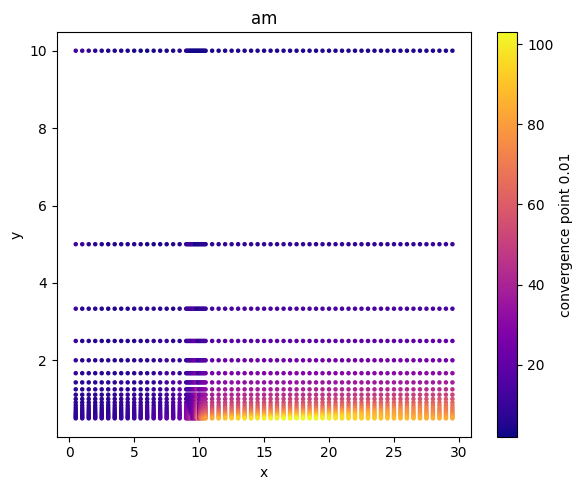

In [10]:
plot_hydros_against_2(all_prob_dicts, "am", 0.01,
                      lambda data_dict, m0 : data_dict["h"] - data_dict["d"][1],
                      lambda data_dict, m0 : data_dict["a"][0],
                      "x", "y")

In [11]:
all_prob_dicts[0].keys()

dict_keys(['h', 'd', 'a', 'region', 'm0s', 1])

In [12]:
variable_funcs_1 = {"(h-d1)/(h-d0)" :  lambda config, m0 : (config["h"]-config["d"][1])/(config["h"]-config["d"][0]),
                  "(h-d0)/radwidth" : lambda config, m0 : (config["h"]-config["d"][0])/config["a"][0]}

def subdivide_lst(data_lst, f, rtol = 0.01):
  group_dict = {}
  for data_dict in data_lst:
    for m0 in data_dict["m0s"]:
      val = f(data_dict, m0)
      stored = False
      keys = ["h", "d", "a", "region", m0]
      out_dict = {key: data_dict[key] for key in keys}
      out_dict["m0s"] = [m0]
      for key in group_dict.keys():
        if abs((val - key)/key) < rtol:
          group_dict[key].append(out_dict)
          stored = True
          break
      if not stored:
        group_dict[val] = [out_dict]
  return group_dict

def plot_wrt_one(data, hydro, error, scale = False, xlab = "Invalid Key", func_pack = None, variable_funcs = variable_funcs_1):
  xfunc = variable_funcs[xlab]
  other_funcs = variable_funcs.copy()
  del other_funcs[xlab]

  key1 = list(other_funcs.keys())[0]
  subdivided = subdivide_lst(data, other_funcs[key1])

  line_count = len(subdivided)
  xf_wrap = lambda data_dict : xfunc(data_dict, data_dict["m0s"][0])
  for key in subdivided.keys():
    subdivided[key].sort(key = xf_wrap)
  
  if func_pack is not None: # Plotting a prediction on the x-axis instead
    entry_func = func_pack["function"]
    xlab = func_pack["xlab"]
  else:
    entry_func = xfunc

  colors = [cm.get_cmap('viridis')(i/(line_count - 1)) for i in range(line_count)]
  count = 0
  
  fig, ax = plt.subplots()
  for key in subdivided.keys():
    xs = [entry_func(data_dict, m0) for data_dict in subdivided[key] for m0 in data_dict["m0s"]]
    ys = [data_dict[m0][f"convergence point {error:.2g} " + hydro] for data_dict in subdivided[key] for m0 in data_dict["m0s"]]
    if scale:
      ys = scale_by(ys, ys[0])
    plt.plot(xs, ys, color = colors[count])
    count += 1
  
  plt.xlabel(xlab)
  if scale:
    ylab = f"convergence point {error:.2g} " + "(scaled to 1st)"
  else: ylab = f"convergence point {error:.2g}"
  plt.ylabel(ylab)
  plt.title(hydro)

  norm = Normalize(vmin=min(subdivided.keys()), vmax=max(subdivided.keys()))
  cmap = plt.get_cmap('viridis')
  sm = ScalarMappable(norm=norm, cmap=cmap)

  cbar = fig.colorbar(sm, ax=ax)
  cbar.set_label(key1)
  plt.show()

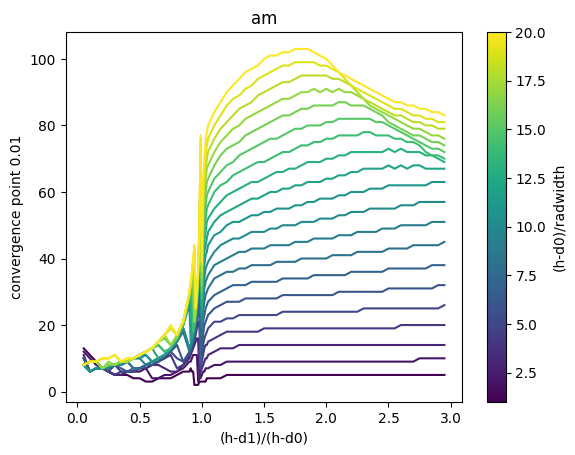

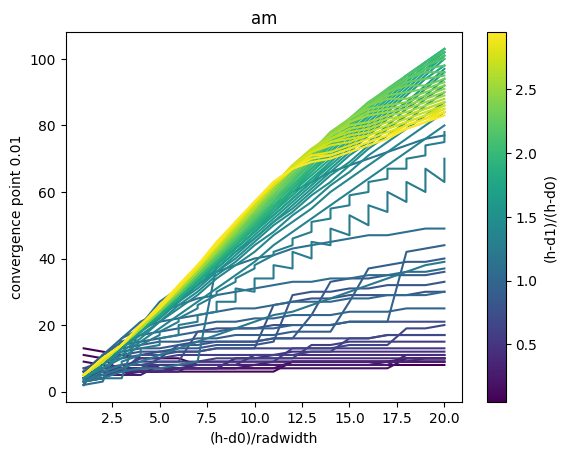

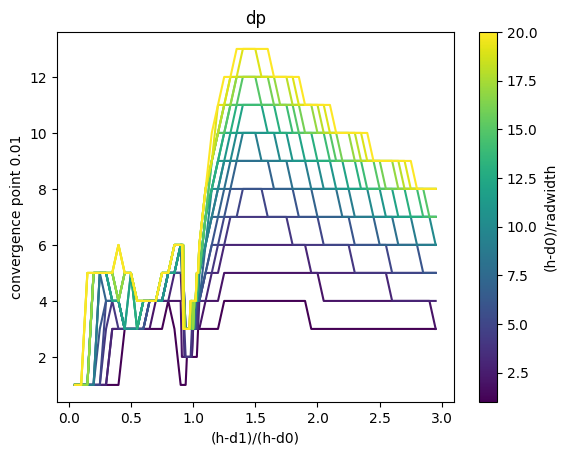

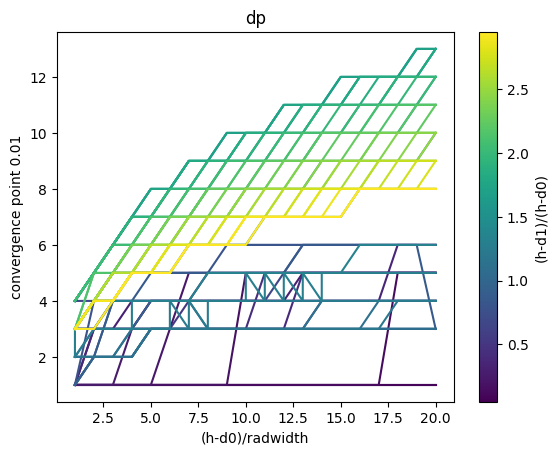

In [13]:
plot_wrt_one(all_prob_dicts, "am", 0.01, xlab = "(h-d1)/(h-d0)")
plot_wrt_one(all_prob_dicts, "am", 0.01, xlab = "(h-d0)/radwidth")
plot_wrt_one(all_prob_dicts, "dp", 0.01, xlab = "(h-d1)/(h-d0)")
plot_wrt_one(all_prob_dicts, "dp", 0.01, xlab = "(h-d0)/radwidth")

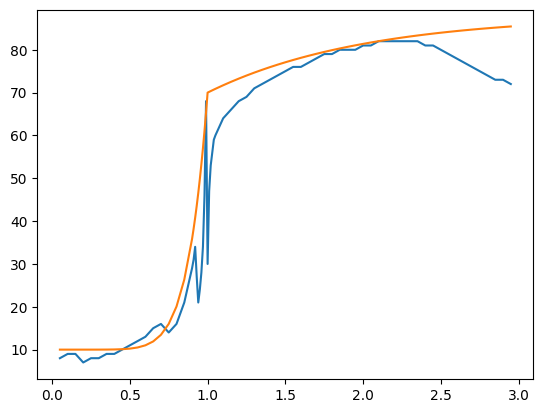

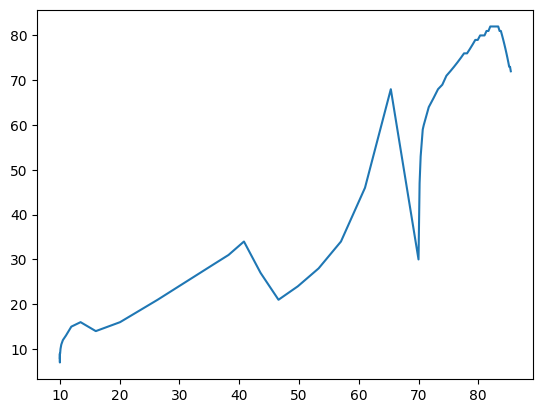

In [14]:
def guess(prob):
  rr = right_uncovered_ratio(prob)
  if rr < 1:
    return rr ** 8
  else:
    return 0.3 * (1 - np.exp(1-rr)) + 1


subset = [prob for prob in all_prob_dicts if (abs(h_minus_d_over_radwidth(prob) - 15) < 0.1) ]
xs = [right_uncovered_ratio(prob) for prob in subset]
# modxs = [(25) * np.atan(20 * (x - 0.95)) + 45 for x in xs]
modxs = [60 * guess(prob) + 10 for prob in subset]
ys = [prob[prob["m0s"][0]]["convergence point 0.01 am"] for prob in subset]
plt.plot(xs, ys)
plt.plot(xs, modxs)
plt.show()
plt.plot(modxs, ys)
plt.show()

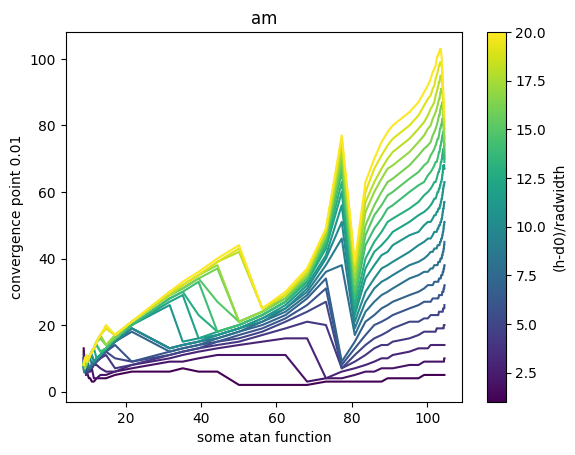

In [15]:
# Try to flatten out the graphs wrt (h-d1)/(h-d0) convergence

def rr_predictor1(data_dict, m0):
  rr = right_uncovered_ratio(data_dict)
  return ((5) * np.atan(20 * (rr - 0.95)) + 9) * 25/4

plot_wrt_one(all_prob_dicts, "am", 0.01, xlab = "(h-d1)/(h-d0)", func_pack = {"function" : rr_predictor1, "xlab" : "some atan function"})

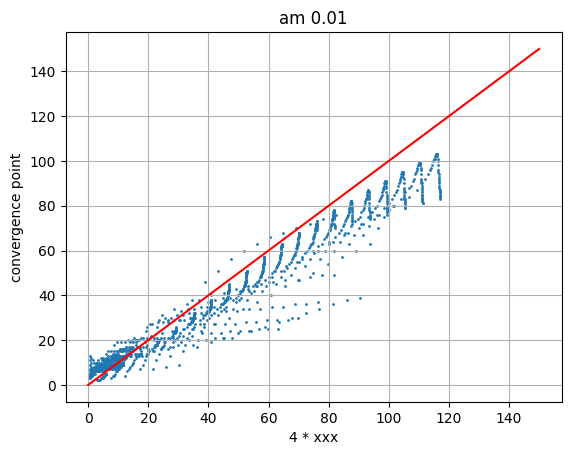

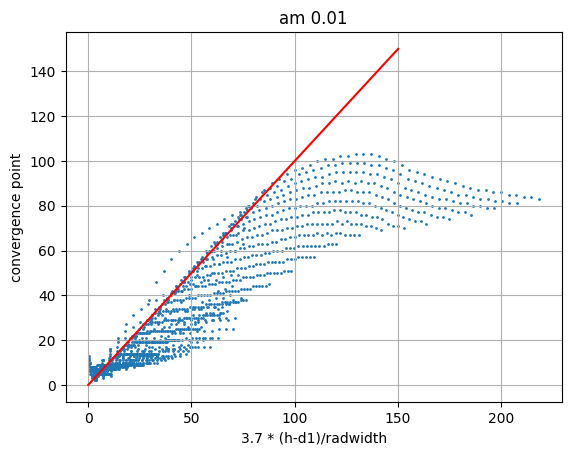

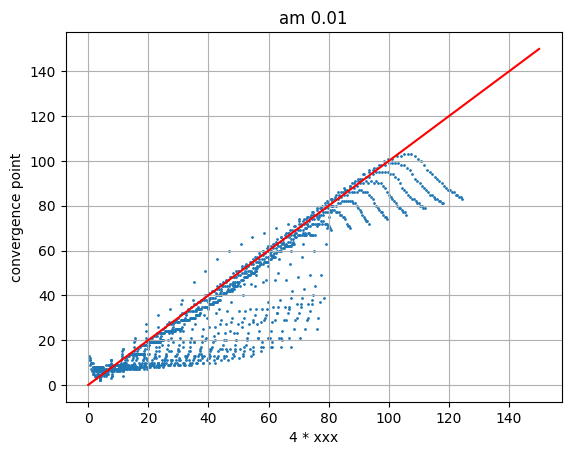

In [16]:
def am_prediction1(data_dict, m0):
  t1 = right_uncovered_ratio(data_dict, over = True)
  t2 = h_minus_d_over_radwidth(data_dict)
  return max(20, (3.7 * t1 * t2))

def am_prediction2(data_dict, m0):
  return 3.7 * (data_dict["h"]-data_dict["d"][1])/data_dict["a"][0]

def am_prediction3(data_dict, m0):
  return 5 * h_minus_d_over_radwidth(data_dict) * np.atan(right_uncovered_ratio(data_dict))

def am_prediction4(data_dict, m0):
  t1 = right_uncovered_ratio(data_dict, over = True)
  t2 = h_minus_d_over_radwidth(data_dict)
  return t2 * ((25) * np.atan(20 * (t1 - 0.95)) + 45) * 0.07

plot_hypothesis(all_prob_dicts, "am", 0.01, am_prediction4, "4 * xxx")
plot_hypothesis(all_prob_dicts, "am", 0.01, am_prediction2, "3.7 * (h-d1)/radwidth")
# plot_hypothesis(all_prob_dicts, "am", 0.01, am_prediction3, "4 * (h-d0)/radwidth")
plot_hypothesis(all_prob_dicts, "am", 0.01, am_prediction3, "4 * xxx")

Keeping (h-d)/radwidth and (h-d1)/(h-d) the same, how much does the convergence of the innermost region vary as other dimensions vary?

Fix (h-d)/radwidth and (h-d1)/(h-d) in 4 combinations (extreme or good for each).

In [ ]:
# raw data generation
file3 = "data/histogram-1.pkl"

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [1, 0, 0]
rho = 1023

def populate_d_a2(h, rr, hmdr):
  hmd0 = random.uniform(low = 5., high = (h-5))
  hmd1 = rr * hmd0
  hmd2 = random.uniform(low = 5., high = (h-5))
  radwidth0 = hmd0/hmdr
  radwidth1 = hmd1/random.uniform(low = 1., high = 3.)
  radwidth2 = hmd2/random.uniform(low = 1., high = 3.)
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  return d, a


pairs = [(2, 0.5), (2, 0.99), (20, 0.5), (20, 0.99)]
# fixed_prob_lsts = []

# for pair in pairs:
#   hmdr = pair[0]
#   rr = pair[1]
#   fixed_prob_lst = []
#   for j in range(50):
#     h = random.uniform(low = 10., high = 50.)
#     m0 = random_m0(h)
#     d, a = populate_d_a2(h, rr, hmdr)
#     prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
#     mk = prob.m_k
#     info = {"h" : h,
#             "d" : d,
#             "a" : a,
#             "region" : 0,
#             "m0s" : [m0]}
#     print(info)
#     data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#     fixed_prob_lst.append(data_dict)
#   fixed_prob_lsts.append(fixed_prob_lst)
#   update_data_file(fixed_prob_lsts, file2)
#   print("Finished an hmdr-rr pair.")

In [18]:
fixed_prob_lsts = open_pkl_file(file3)
for fixed_prob_lst in fixed_prob_lsts:
  generate_convergence_data(fixed_prob_lst, [0.01, 0.005])
  # Ignoring log data for now.
  # log_data = generate_log_data(fixed_prob_lst)

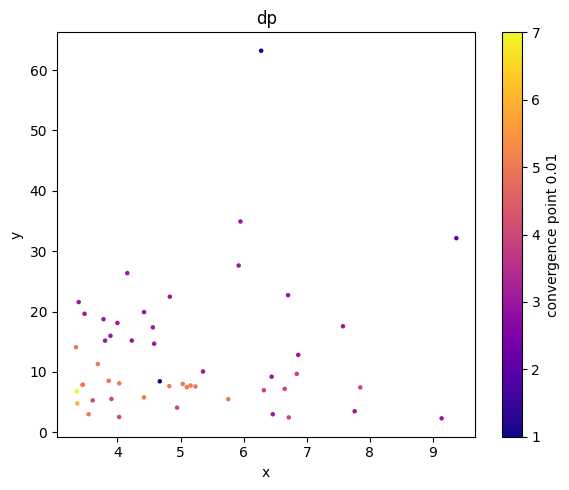

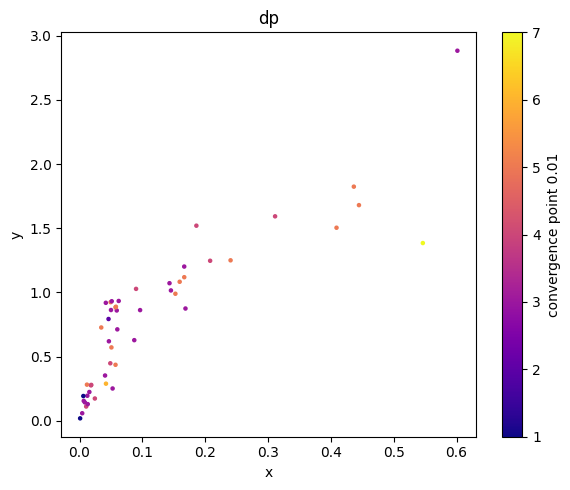

In [19]:
plot_hydros_against_2(fixed_prob_lsts[2], "dp", 0.01,
                      lambda prob, m0 : (prob["a"][1] - (prob["a"][0]))/(prob["a"][0]),
                      lambda prob, m0 : (prob["a"][2] - (prob["a"][1]))/(prob["a"][0]),
                      "x", "y")

plot_hydros_against_2(fixed_prob_lsts[2], "dp", 0.01,
                      lambda prob, m0 :m0/(prob["a"][2] - (prob["a"][0])),
                      lambda prob, m0 : m0,
                      "x", "y")

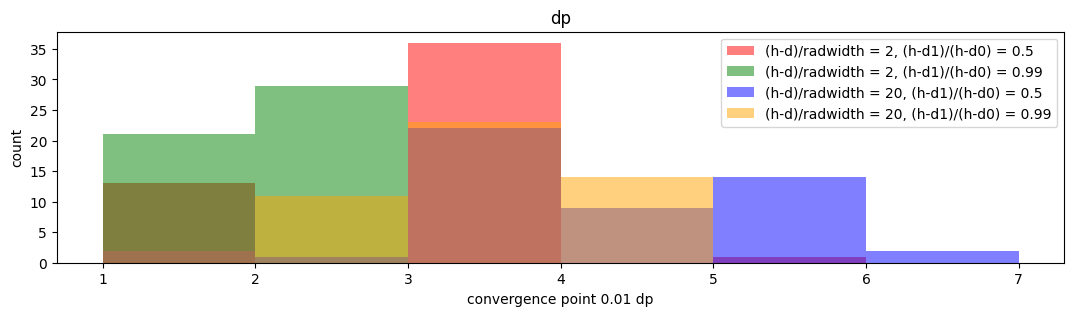

In [20]:
# Expectation: If the value depends on little else, points for each fixed pair should be clustered around a point, small standard deviation.
# Representation: For each fixed pair, create a histogram (AM).

def histogram(data, hydro, error, ylab = "count", title = "convergence"):
  vals = [data_dict[data_dict["m0s"][0]][f"convergence point {error:.2g} " + hydro] for data_dict in data]
  print(vals)
  print(np.arange(min(vals), max(vals)+1, 1))
  plt.hist(vals, bins = np.arange(min(vals), max(vals)+1, 1))
  plt.xlabel(f"convergence point {error:.2g} " + hydro)
  plt.ylabel(ylab)
  plt.title(hydro + " " + title)
  plt.show()

def four_histogram(all_data, hydro, error, labels, ylab = "count", title = None):
  vals_lst = []
  for data in all_data:
    vals_lst.append([data_dict[data_dict["m0s"][0]][f"convergence point {error:.2g} " + hydro] for data_dict in data])
  all_vals = np.concatenate(vals_lst)
  bins = (np.arange(min(all_vals), max(all_vals)+1, 1))
  colors = ["Red", "Green", "Blue", "Orange"]
  fig, ax = plt.subplots(figsize=(13, 3))
  for idx, val in enumerate(vals_lst):
    ax.hist(val, bins = bins, color=colors[idx], label = labels[idx], alpha = 0.5, rwidth = 1.0)
  ax.set_xlabel(f"convergence point {error:.2g} " + hydro)
  ax.set_ylabel(ylab)
  if title is None:
    title = hydro
  ax.set_title(title)
  plt.legend()
  plt.show()

hist_labs = [f"(h-d)/radwidth = {pair[0]:.2g}, (h-d1)/(h-d0) = {pair[1]:.2g}" for pair in pairs]

four_histogram(fixed_prob_lsts, "dp", 0.01, hist_labs)

In [21]:
# Possible phenomenon is that a skinny outermost body region will not shield interior region convergence from an m0 dependence.
# Not explored here, but explore damping.

In [ ]:
# Inspect the dependence of radial distance to e-region on damping.
file4 = "data/predetermined-3.pkl"

# all_prob_dicts = open_pkl_file(file5)
# generate_convergence_data(all_prob_dicts, [0.01, 0.005])

def populate_d_a3(h, hmdr, right_ratio, dist_to_e_region):
  radwidth2, radwidth1 = dist_to_e_region/2, dist_to_e_region/2
  hmd2, hmd1 = radwidth2 * 1.1, radwidth1
  hmd0 = hmd1/right_ratio
  radwidth0 = hmd0/hmdr
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  for i in range(3):
    assert d[i] > 0
  return d, a

def populate_d_a4(h, hmdr, right_ratio, dist_to_e_region):
  # just 2 regions
  hmd0 = 0.2 * h
  hmd1 = hmd0 * right_ratio
  radwidth0 = hmd0/hmdr
  radwidth1 = dist_to_e_region
  hmds = [hmd0, hmd1]
  radwidths = [radwidth0, radwidth1]
  d = [h - hmds[i] for i in range(2)]
  a = [sum(radwidths[:i + 1]) for i in range(2)]
  for i in range(2):
    assert d[i] > 0
  return d, a

def populate_d_a5(h, hmdr, right_ratio, dist_to_e_region):
  # Very similar to previous, but with 3 regions
  hmd0 = 0.2 * h
  hmd1 = hmd0 * right_ratio
  hmd2 = hmd1 * 1.1
  radwidth0 = hmd0/hmdr
  radwidth1 = dist_to_e_region/2
  radwidth2 = dist_to_e_region/2
  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  for i in range(2):
    assert d[i] > 0
  return d, a

def swap_vals(prob, d, a):
  # Avoids mk recomputations.
  prob.d = d
  prob.a = a
  prob.scale = a
  return prob

big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [1, 0, 0]
rho = 1023

# Code was varied to generate 3 data sets, all in file4 now
# all_prob_dicts = []
# m0s = list(np.linspace(0.1, 2, 20))
# m0h = 10
# hmdr = 20
# right_ratio = 1.5
# for m0 in m0s:
#   h = m0h/m0
#   hmd1 = 0.2 * h * right_ratio
#   dist_to_e_regions = list(np.linspace(hmd1/3, hmd1, 10))
#   prob = ConvergenceProblemI(h, [3, 2, 1], [1, 2, 3], heaving, NMK, m0, rho)
#   mk = prob.m_k
#   for dist_to_e_region in dist_to_e_regions:
#     d, a = populate_d_a5(h, hmdr, right_ratio, dist_to_e_region)
#     info = {"h" : h,
#             "d" : d,
#             "a" : a,
#             "region" : 0,
#             "m0s" : [m0]}
#     print(info)
#     swap_vals(prob, d, a)
#     data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#     all_prob_dicts.append(data_dict)
#   update_data_file(all_prob_dicts, file6)
#   print("Finished an m0.")


[22, 19, 17, 14, 13, 11, 10, 9, 8, 7]
[23, 20, 17, 15, 14, 12, 11, 9, 8, 7]
[17, 15, 14, 12, 11, 10, 8, 8, 7, 6]


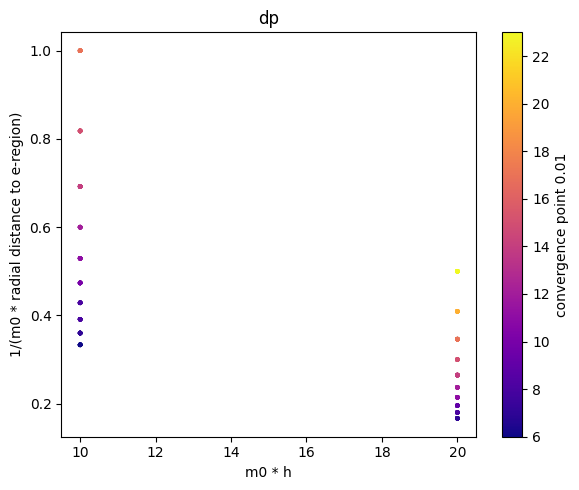

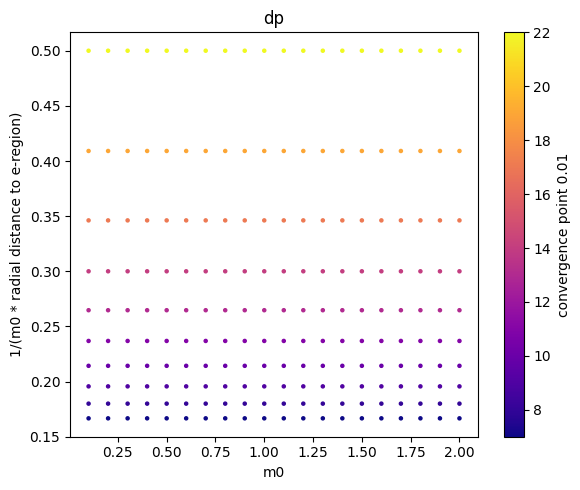

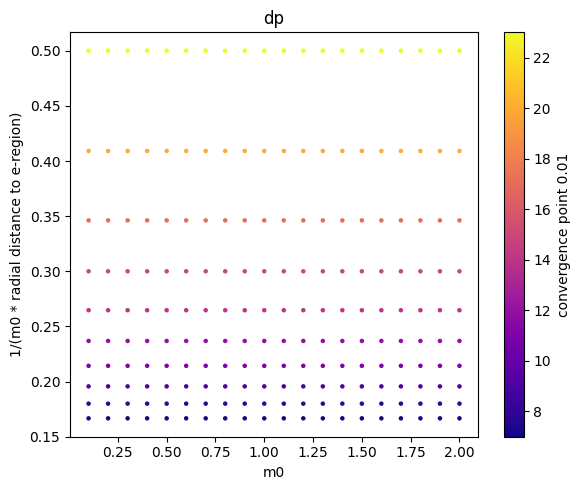

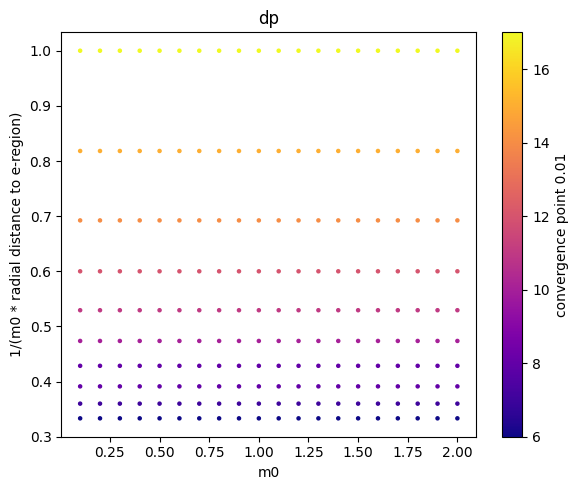

In [23]:
full_sets = open_pkl_file(file4)
for full_set in full_sets: generate_convergence_data(full_set, [0.01, 0.005])
all_subsets = [[prob for prob in full_set if prob["m0s"][0] == 0.1] for full_set in full_sets]
convergence_point_lsts = [[prob[prob["m0s"][0]][f"convergence point 0.01 dp"] for prob in subset] for subset in all_subsets]

for lst in convergence_point_lsts: print(lst)

plot_hydros_against_2((full_sets[1] + full_sets[2]), "dp", 0.01,
                        lambda data_dict, m0 : m0 * data_dict["h"] ,
                        lambda data_dict, m0 : 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
                        "m0 * h", "1/(m0 * radial distance to e-region)")

for full_set in full_sets:
  plot_hydros_against_2(full_set, "dp", 0.01,
                        lambda data_dict, m0 : m0,
                        lambda data_dict, m0 : 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
                        "m0", "1/(m0 * radial distance to e-region)")

[22, 19, 17, 14, 13, 11, 10, 9, 8, 7]
[23, 20, 17, 15, 14, 12, 11, 9, 8, 7]
[17, 15, 14, 12, 11, 10, 8, 8, 7, 6]


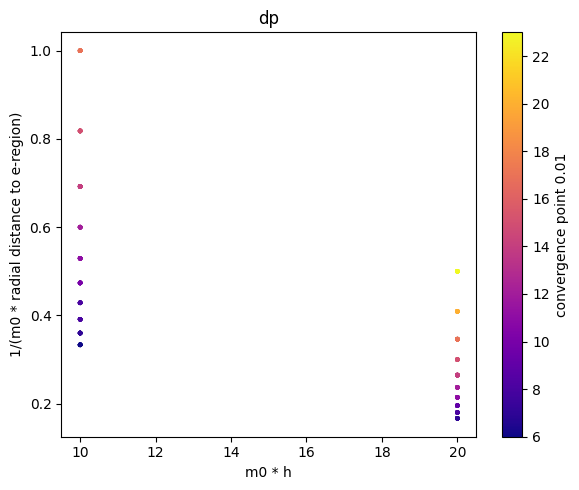

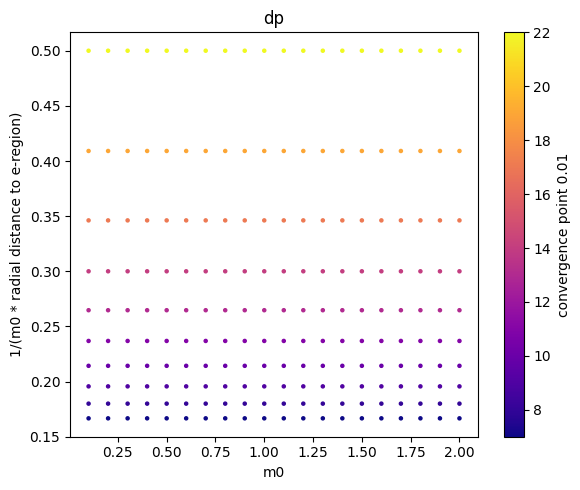

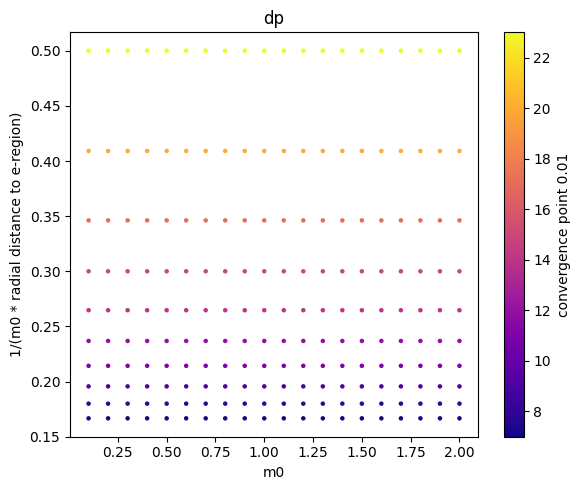

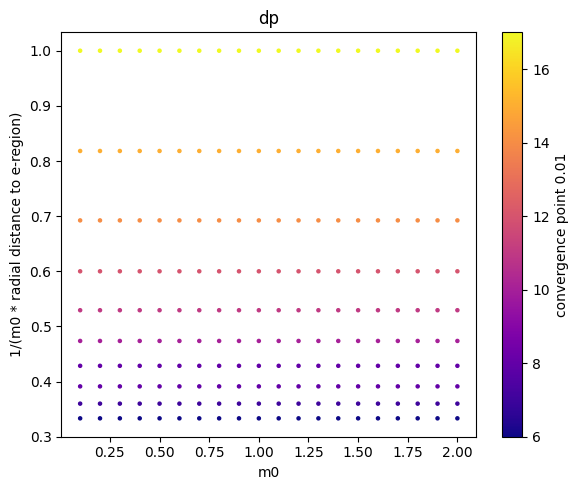

In [24]:
full_sets = open_pkl_file(file4)
for full_set in full_sets: generate_convergence_data(full_set, [0.01, 0.005])
all_subsets = [[prob for prob in full_set if prob["m0s"][0] == 0.1] for full_set in full_sets]
convergence_point_lsts = [[prob[prob["m0s"][0]][f"convergence point 0.01 dp"] for prob in subset] for subset in all_subsets]

for lst in convergence_point_lsts: print(lst)

plot_hydros_against_2((full_sets[1] + full_sets[2]), "dp", 0.01,
                        lambda data_dict, m0 : m0 * data_dict["h"] ,
                        lambda data_dict, m0 : 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
                        "m0 * h", "1/(m0 * radial distance to e-region)")

for full_set in full_sets:
  plot_hydros_against_2(full_set, "dp", 0.01,
                        lambda data_dict, m0 : m0,
                        lambda data_dict, m0 : 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
                        "m0", "1/(m0 * radial distance to e-region)")


slope = 6.5, intercept = 10, r^2 = 0.075, p = 0.32


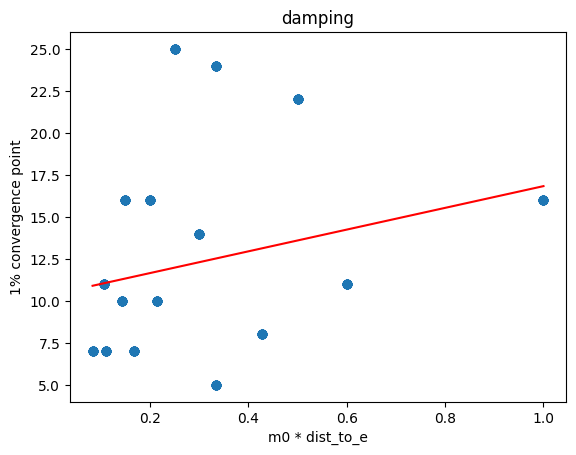

slope = 7.1, intercept = 11, r^2 = 0.093, p = 0.27


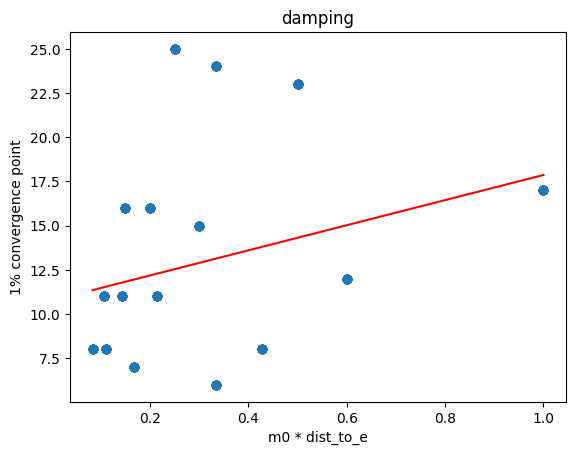

In [ ]:
def plot_against_m0_dist_to_e(data, xlab = "m0 * dist_to_e", mod_func = lambda x : x):
  xs, ys = [], []
  lin_xs, lin_ys = [], []
  for data_dict in data:
    for m0 in data_dict["m0s"]:
      x = mod_func(1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])))
      y = data_dict[data_dict["m0s"][0]][f"convergence point 0.01 dp"]
      if not any(math.isclose(xi, x, rel_tol=0.001, abs_tol=0.0) for xi in xs):
        lin_xs.append(x)
        lin_ys.append(y)
      xs.append(x)
      ys.append(y)
  plt.scatter(xs, ys)
  slope, intercept, r_value, p_value, std_err = stats.linregress(lin_xs, lin_ys)
  fit_xs = np.linspace(min(xs), max(xs), 100)
  fit_ys = slope * fit_xs + intercept
  plt.plot(fit_xs, fit_ys, color = "red")
  print(f"slope = {slope:.2g}, intercept = {intercept:.2g}, r^2 = {r_value**2:.2g}, p = {p_value:.2g}")
  plt.xlabel(xlab)
  plt.ylabel("1% convergence point")
  plt.title("damping")
  plt.show()


for full_set in full_sets:
  plot_against_m0_dist_to_e(full_set,
                            mod_func = lambda x : 60 * np.log(x + 1))

In [ ]:
# Sweep over a wider range of m0s.
file5 = "data/predetermined-4.pkl"

big_nmk = 200
nmk_max = 150
rho = 1023

# all_prob_sets = [[], []]
m0s = list(np.linspace(3, 10, 8)) + list(np.linspace(15, 40, 6))
m0hs = list(np.linspace(10, 40, 4))
hmdr = 20
right_ratio = 1.5

def file_5_data_generator(prob_set, NMK, heaving, init_d, init_a, populate_f, m0, m0h):
  h = m0h/m0
  hmd1 = 0.2 * h * right_ratio
  dist_to_e_regions = list(np.linspace(hmd1/3, hmd1, 4))
  prob = ConvergenceProblemI(h, init_d, init_a, heaving, NMK, m0, rho)
  mk = prob.m_k
  for dist_to_e_region in dist_to_e_regions:
    d, a = populate_f(h, hmdr, right_ratio, dist_to_e_region)
    info = {"h" : h,
            "d" : d,
            "a" : a,
            "region" : 0,
            "m0s" : [m0]}
    print(info)
    swap_vals(prob, d, a)
    data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
    prob_set.append(data_dict)
  return prob_set

# NMK = [big_nmk] * 3
# heaving = [1, 0]
# prob_set = []
# for m0 in m0s:
#   for m0h in m0hs:
#     prob_set = file_5_data_generator(prob_set, NMK, heaving, [3, 2], [1, 2], populate_d_a4, m0, m0h)
#   all_prob_sets[0] = prob_set
#   update_data_file(all_prob_sets, file5)
#   print("Finished an m0.")
# print("Finished the two-regions.")

# NMK = [big_nmk] * 4
# heaving = [1, 0, 0]
# prob_set = []
# for m0 in m0s:
#   for m0h in m0hs:
#     prob_set = file_5_data_generator(prob_set, NMK, heaving, [3, 2, 1], [1, 2, 3], populate_d_a5, m0, m0h)
#   all_prob_sets[1] = prob_set
#   update_data_file(all_prob_sets, file5)
#   print("Finished an m0.")
# print("Finished the three-regions.")

# Vary m0h while keeping the other dependencies constant.
# Want to find out if it's m0*h or m0*(h-d0)


In [35]:
len(full_sets)

2

[]
[]


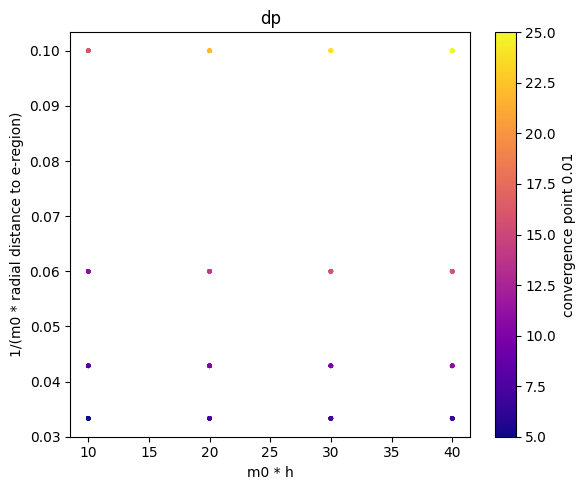

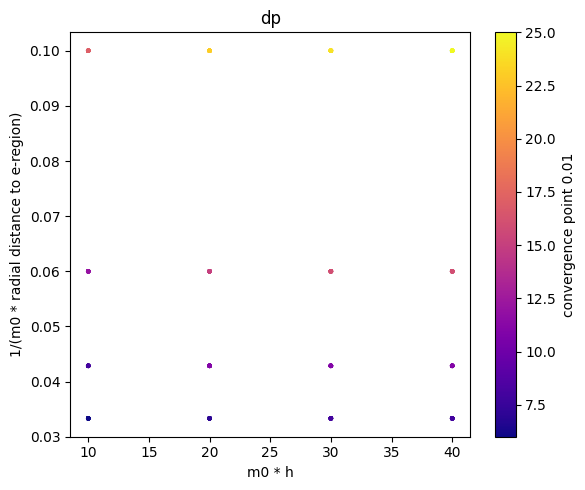

In [40]:
full_sets = open_pkl_file(file5)
for full_set in full_sets: generate_convergence_data(full_set, [0.01, 0.005])
for full_set in full_sets: generate_log_data(full_set)
all_subsets = [[prob for prob in full_set if prob["m0s"][0] == 0.1] for full_set in full_sets]
convergence_point_lsts = [[prob[prob["m0s"][0]][f"convergence point 0.01 dp"] for prob in subset] for subset in all_subsets]

for lst in convergence_point_lsts: print(lst)

# plot_hydros_against_2(full_sets[0], "dp", 0.01,
#                         lambda data_dict, m0 : m0 * data_dict["h"] ,
#                         lambda data_dict, m0 : 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
#                         "m0 * h", "1/(m0 * radial distance to e-region)")

# plot_hydros_against_2(full_sets[1], "dp", 0.01,
#                         lambda data_dict, m0 : m0 * data_dict["h"] ,
#                         lambda data_dict, m0 : 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
#                         "m0 * h", "1/(m0 * radial distance to e-region)")

plot_hydros_against_2(full_sets[0], "dp", 0.01,
                        lambda data_dict, m0 : m0 * data_dict["h"] ,
                        lambda data_dict, m0 : data_dict["a"][0]/((data_dict["a"][-1] - data_dict["a"][0])),
                        "m0 * h", "1/(m0 * radial distance to e-region)")

plot_hydros_against_2(full_sets[1], "dp", 0.01,
                        lambda data_dict, m0 : m0 * data_dict["h"] ,
                        lambda data_dict, m0 : data_dict["a"][0]/((data_dict["a"][-1] - data_dict["a"][0])),
                        "m0 * h", "1/(m0 * radial distance to e-region)")

In [28]:
variable_funcs_2 = {"m0h" :  lambda config, m0 : m0 * config["h"],
                    "(h-d0)/radwidth" : lambda config, m0 : (config["h"]-config["d"][0])/config["a"][0],
                    "1/(m0 * e_dist)" : lambda data_dict, m0: 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
                    "m0" : lambda data_dict, m0 : m0,
                    "m0(h-d0)" : lambda config, m0 : m0 * (config["h"]-config["d"][0])}

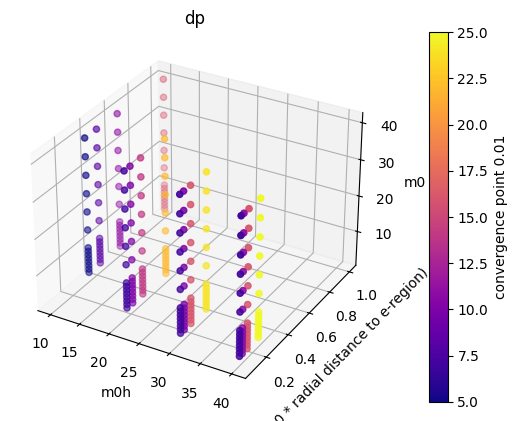

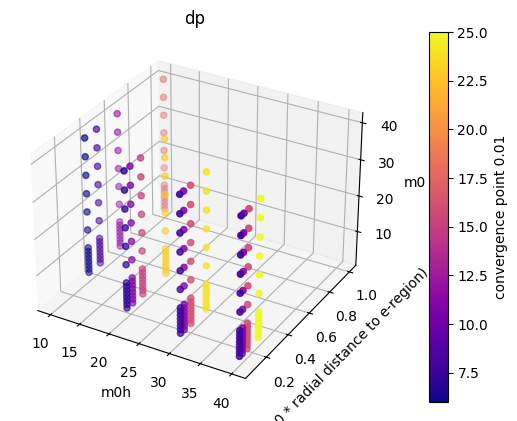

In [29]:
for full_set in full_sets:
  plot_hydros_against_3(full_set, "dp", 0.01,
                        lambda data_dict, m0 : m0 * data_dict["h"],
                        lambda data_dict, m0 : 1/(m0 * (data_dict["a"][-1] - data_dict["a"][0])),
                        lambda data_dict, m0 : m0,
                        "m0h", "1/(m0 * radial distance to e-region)", "m0")

In [30]:
for full_set in full_sets:
  for data_dict in full_set:
    for m0 in data_dict["m0s"]:
      print(variable_funcs_2["1/(m0 * e_dist)"](data_dict, m0))

1.0
0.6
0.42857142857142855
0.3333333333333333
0.5
0.3
0.21428571428571427
0.16666666666666666
0.3333333333333333
0.2
0.14285714285714288
0.1111111111111111
0.25
0.15
0.10714285714285714
0.08333333333333333
1.0
0.6000000000000001
0.4285714285714286
0.3333333333333333
0.5
0.30000000000000004
0.2142857142857143
0.16666666666666666
0.3333333333333333
0.2
0.14285714285714285
0.1111111111111111
0.25
0.15000000000000002
0.10714285714285715
0.08333333333333333
0.9999999999999998
0.5999999999999999
0.42857142857142855
0.33333333333333326
0.4999999999999999
0.29999999999999993
0.21428571428571427
0.16666666666666663
0.33333333333333326
0.19999999999999996
0.14285714285714282
0.11111111111111109
0.24999999999999994
0.14999999999999997
0.10714285714285714
0.08333333333333331
1.0
0.6
0.42857142857142855
0.3333333333333333
0.5
0.3
0.21428571428571427
0.16666666666666666
0.3333333333333333
0.2
0.14285714285714288
0.1111111111111111
0.25
0.15
0.10714285714285714
0.08333333333333333
0.9999999999999998

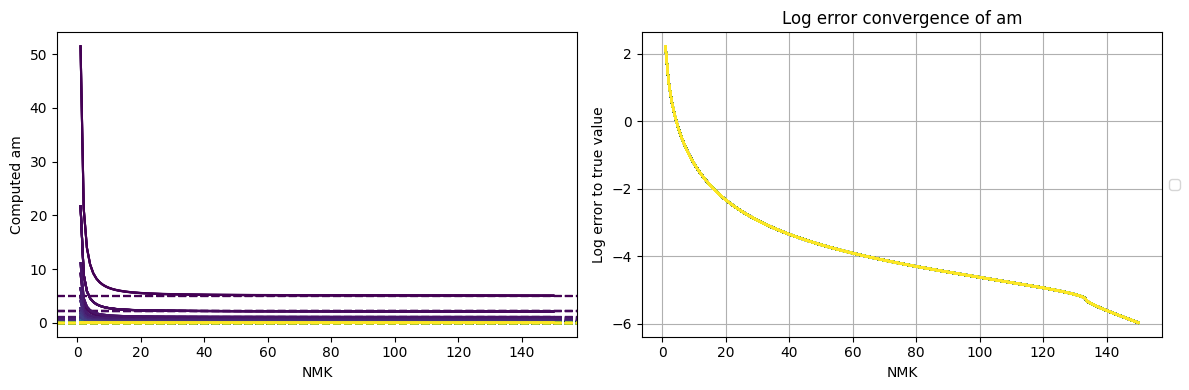

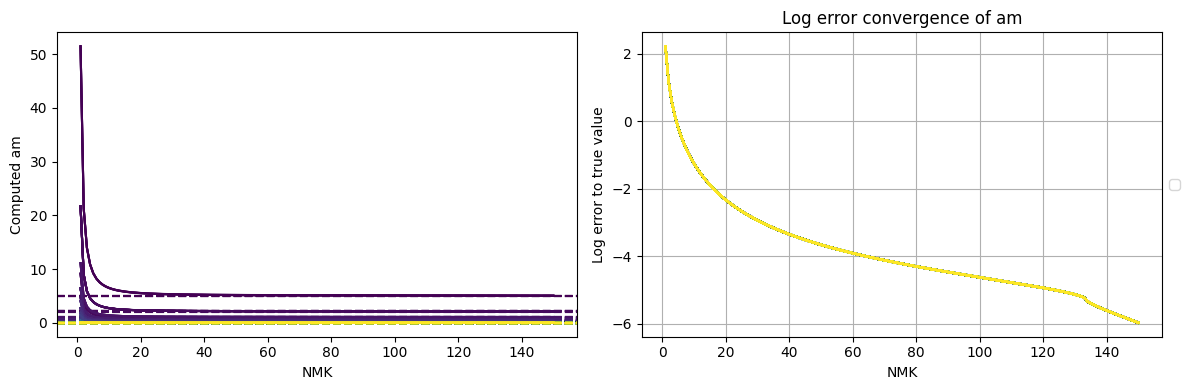

In [31]:
for full_set in full_sets:
  data = many_data_dicts_to_convergence_plot_data(full_set)
  colors = color_by_f_value(variable_funcs_2["m0"], full_set)
  plot_set_convergence_and_log(data, "am", colors = colors)
  # plot_set_convergence_and_log(data, "dp", colors = colors)

In [32]:
for full_set in full_sets:
  plot_wrt_one(full_set, "dp", 0.01, xlab = "m0h", variable_funcs = variable_funcs_2)
  plot_wrt_one(full_set, "dp", 0.01, xlab = "1/(m0 * e_dist)", variable_funcs = variable_funcs_2)

ZeroDivisionError: division by zero